In [1]:
import sys, os, re
sys.path.append(os.path.abspath('../'))

from pathlib import Path

import cv2
import numpy as np
import tensorflow as tf
import seaborn as sns
sns.set_style('whitegrid')

from matplotlib import pyplot as plt
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import utils

In [2]:
classes = utils.CLASS_NAMES

In [3]:
experiment_dir = Path("../experiments/original/")
best_model_path = str(experiment_dir / "checkpoints" / "best_model")
dataset_dir = str(experiment_dir / "data" / "train")
image_paths, image_labels, class_names = utils.get_image_paths_and_labels(dataset_dir, shuffle=False, random_seed=None)

Found 2067 files belonging to 10 classes.


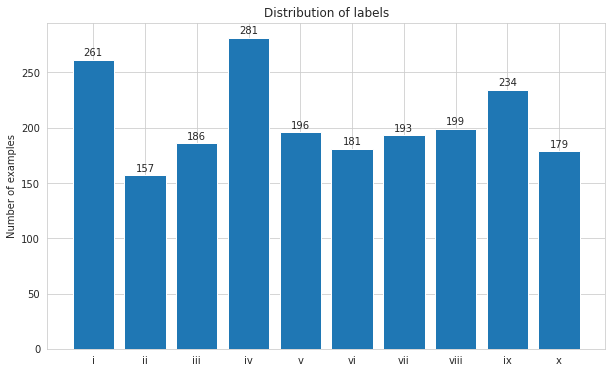

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
label_counts = np.bincount(image_labels)
rects = ax.bar(utils.CLASS_NAMES, label_counts)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%d' % int(height), ha='center', va='bottom')
ax.set_ylabel("Number of examples")
ax.set_title("Distribution of labels");

In [5]:
prediction_path = experiment_dir / "predictions" / "predictions-val.npz"
loaded_file = np.load(prediction_path)
output = loaded_file["output"]
y_true = np.array(output[:,0], dtype=int)
y_pred = np.array(output[:,1], dtype=int)
y_proba = output[:,2:]

In [6]:
with open(f"{prediction_path}-image-paths.txt", "r") as fp:
    predicted_image_paths = [l.strip() for l in fp.readlines()]

In [7]:
accuracy = (y_true == y_pred).sum() / len(y_true)
accuracy

0.6740467404674046

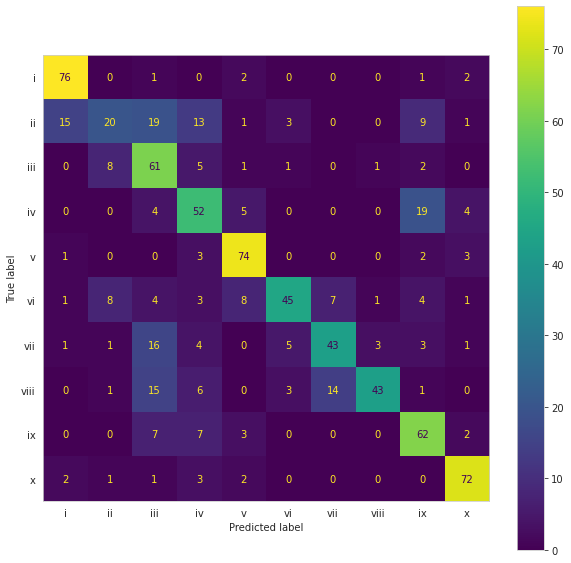

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=classes)

cm_display.plot(ax=ax)

In [9]:
len(image_paths)

2067

In [10]:
def display_image(index):
    img_path = image_paths[index]
    img1 = cv2.imread(img_path)
    label_true = classes[y_true[index]]
    label_pred = classes[y_pred[index]]
    pred_proba = y_proba[index]
    fig, ax = plt.subplots(figsize=(5,5))
    ax.grid(False)
    ax.imshow(img1)
    display(HTML(f"True label: <strong>{label_true}</strong> Predicted: <strong>{label_pred}</strong>"))
    display(pred_proba)
    return None

In [11]:
interaction = interact(
    display_image,
    index=widgets.IntSlider(min=0, max=len(image_paths)-1, continuous_update=False)
);

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=2066), Output()), _…